In [2]:
from scipy.stats import ttest_ind
# loading Python modules
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

# silence please; developers at work
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/employee_lifetime_values.csv')

xNS = df[df["group"]=="NS"]['ELV']
xS = df[df["group"]=="S"]['ELV']

ttest_ind(xNS, xS).pvalue

0.046999086677830995

In [12]:
ttest_ind(xS, xNS, equal_var=False, permutations=500000).pvalue

0.046798

In [4]:
# append question mark ? to any method to get a jupyter popup of help
# sns.displot?

In [5]:
xNS.mean(), xS.mean()

(1018.4107777401603, 1148.434936218507)

In [4]:
def cohend(d1, d2):
    """Calculate Cohen's d for independent samples"""
    n1, n2 = len(d1), len(d2)
    mu1, mu2 = np.mean(d1), np.mean(d2)
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    # calculate the pooled standard deviation
    pooleds = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # return the effect size
    return (mu1 - mu2) / pooleds

cohend(xS.values, xNS.values)

0.5195925482978414

<AxesSubplot:xlabel='ELV', ylabel='Count'>

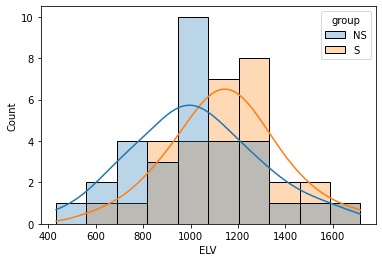

In [6]:
# sns.histplot([xA,xB], colors=['r', 'b'])
sns.histplot(data=df, x="ELV", hue="group", bins=10, kde=True, alpha=0.3)
# sns.displot(data=df, x="ELV", hue="group", bins=10, kde=True)

In [8]:
# xA.hist(alpha=0.3)
# xB.hist(alpha=0.3)

In [9]:
# xA['ELV']

In [10]:
# sample mean and standard deviation are approximations of the population mean and std
meanA = df[df['group']=="A"]['ELV'].mean()
stdA = df[df['group']=="A"]['ELV'].std(ddof=0)
print("The sample mean and sample standard deviation for Group A are:")
meanA, stdA

The sample mean and sample standard deviation for Group A are:


(nan, nan)

In [11]:
meanB = df[df['group']=="B"]['ELV'].mean()
stdB = df[df['group']=="B"]['ELV'].std()
print("The sample mean and sample standard deviation for Group B are:")
meanB, stdB

The sample mean and sample standard deviation for Group B are:


(nan, nan)

In [12]:
# another way to get an estimate of the population parameters is to
# use the `fit` method on a probability distribution model:
from scipy.stats.distributions import norm

In [13]:
# fit a normal distribution for Group A
norm.fit(df[df['group']=="A"]['ELV'], method="MLE")

(nan, nan)

In [14]:
# fit a normal distribution for Group B
norm.fit(df[df['group']=="B"]['ELV'], method="MLE")

(nan, nan)

The estimates obtaind from the `fit` method are called "maximum likelyhood estimates" (MLE) meaning the computer went over all the possible parametes for the group mean $\mu$ and standard deviation $\sigma$ and picked the parameters that are most likely to have generated the data.

This is a thing now. Computers are fast enough to perform complicated search algorithms and solve optimization problems in just a few seconds to tell you the parameters $(\mu, \sigma)$ that best describe the data distribution from which the sample comes from.

In [15]:
# the method of moments (MM) is another general-purpse way to
# compute estimates for the model parameters:
#   obtain a formula for the first moment of the distribution (set to the sample mean)
#   obtain a formula for the second moment around mean (set to value computed from sample variance)
norm.fit(df[df['group']=="S"]['ELV'], method="MM")

(1148.434936218507, 229.1205402181783)

In [16]:
# note there is a slight difference with the estimate obtained
# using the .std() estimator above (difference due to 1/(n-1) vs. 1/n in formulas)

In [17]:
xS.values

array([1297.43974545,  776.4092753 , 1207.47993271, 1203.30070962,
       1127.58354289, 1464.32323209,  926.94024369, 1550.08237458,
       1111.03279275, 1057.69226384, 1361.04704887, 1108.01035289,
       1054.52971369, 1232.11105274,  623.05522436,  862.35998437,
       1011.34327876, 1088.06134326, 1188.15991197, 1434.0066367 ,
        843.81015587, 1716.60528989,  987.6377452 , 1094.02274609,
       1225.66317751,  931.61218678, 1329.6763341 , 1293.02666292,
       1240.43572131, 1105.58940635])

<AxesSubplot:ylabel='Count'>

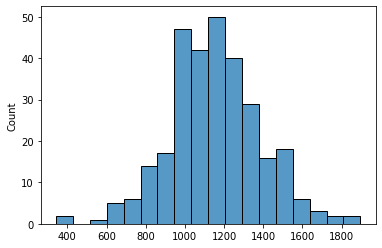

In [18]:
xbarML, sML = norm.fit(df[df['group']=="S"]['ELV'])
xAsim = norm(xbarML, sML)
sns.histplot(xAsim.rvs(300))


### Generate the LM data

$$
  \texttt{ELV} = 1000 + 2.5 \cdot \texttt{hours}
$$

In [19]:
import numpy as np
from scipy.stats import uniform, norm
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [20]:
# np.random.seed(seed=15)
np.random.seed(seed=154)

u100 = uniform(0, 100)
x = u100.rvs(33)

n300 = norm(0, 100)
eps = n300.rvs(33)

beta1 = 2.5

y = 1000 + beta1*x + eps
y

array([1212.12481464, 1250.05149229, 1112.04144626, 1312.24415031,
       1384.47772588, 1254.08450005, 1203.27273493, 1093.62618248,
       1051.48650707, 1197.86596806, 1133.88090698, 1298.78467044,
        934.52101193, 1118.34329042, 1154.94706391, 1346.38071911,
       1042.01630456, 1188.49358566,  929.19568517, 1163.89043525,
       1253.61901515, 1113.6548693 , 1278.74293845,  941.30318049,
       1062.21406426,  978.45237538, 1254.42811762, 1158.79506307,
       1272.67196778, 1038.74408388, 1174.99660956,  958.89949136,
       1215.29762549])

In [21]:
# # save generated data
# df = pd.DataFrame({'hours': x, 'ELV': y})
# with pd.ExcelWriter("data/ELV_vs_hours.ods") as writer:
#     df.to_excel(writer, sheet_name="Data", index=None)

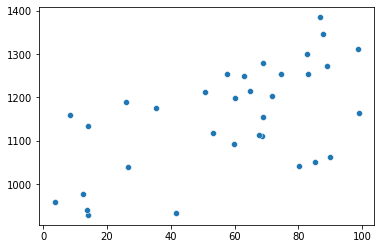

In [22]:
fig, ax = plt.subplots()
ax = sns.scatterplot(x, y, ax=ax)

In [23]:
# Using statsmodels 
# see https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html
X = sm.add_constant(x)
mod = sm.OLS(y, X)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     17.61
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           0.000211
Time:                        12:35:29   Log-Likelihood:                -197.71
No. Observations:                  33   AIC:                             399.4
Df Residuals:                      31   BIC:                             402.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1005.6018     39.417     25.512      0.000     925.210    1085.994
x1             2.5688      0.612      4.196      0.000       1.320       3.817
==============================================================================
Omnibus:                        3.905   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                2.154
Skew:                          -0.372   Prob(JB):                        0.341
Kurtosis:                       1.994   Cond. No.                         146.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# sm.graphics.plot_regress_exog(res, 1)

In [25]:
# sns.scatterplot(x, res.fittedvalues)

In [26]:
# extact the best-fit model parameters
beta0, beta1 = res.params
beta0, beta1

(1005.6017975815952, 2.568840400043655)

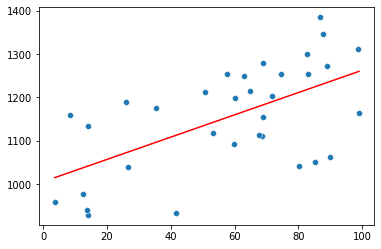

In [27]:
sns.lineplot(x, beta0+beta1*x, ax=ax, color="red")
fig

In [28]:
## Using LA
col_of_ones = np.ones((len(x),1))
X = np.concatenate([col_of_ones,x[:,np.newaxis]], axis=1)
X.shape, y.shape

((33, 2), (33,))


We obtain the least squares solution using the Moore–Penrose inverse formula:
$$ \Large
    \vec{\beta} = (X^{\sf T} X)^{-1}X^{\sf T}\; \vec{y}
$$

In [29]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
beta

array([1005.60179758,    2.5688404 ])

In [30]:
## Using statsmodels formula
df = pd.DataFrame({'hours':x, 'ELV': y})
mod2 = smf.ols('ELV ~ 1 + hours', data=df)
res2 = mod2.fit()

In [31]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ELV   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     17.61
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           0.000211
Time:                        12:35:30   Log-Likelihood:                -197.71
No. Observations:                  33   AIC:                             399.4
Df Residuals:                      31   BIC:                             402.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1005.6018     39.417     25.512      0.000     925.210    1085.994
hours          2.5688      0.612      4.196      0.000       1.320       3.817
==============================================================================
Omnibus:                        3.905   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                2.154
Skew:                          -0.372   Prob(JB):                        0.341
Kurtosis:                       1.994   Cond. No.                         146.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
## Using scikit-learn
# see https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

from sklearn import linear_model
mod3 = linear_model.LinearRegression()
mod3.fit(x[:,np.newaxis], y)
mod3.intercept_, mod3.coef_

(1005.601797581596, array([2.5688404]))

In [33]:
from sklearn.metrics import r2_score
y_pred = mod3.predict(x[:,np.newaxis])

# The coefficient of determination: 1 is perfect prediction
R2 = r2_score(y, y_pred)
print('R-squared: %.2f' % R2)


R-squared: 0.36


In [34]:
## Using SciPy linregress
# see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
from scipy.stats import linregress
res4 = linregress(x, y)
res4.intercept, res4.slope

(1005.601797581596, 2.568840400043651)

In [35]:
print('R-squared: %.2f' % res4.rvalue**2)

R-squared: 0.36


In [36]:
# Two-sided inverse Students t-distribution
# p - probability, df - degrees of freedom
from scipy.stats import t
tinv = lambda p, df: abs(t.ppf(p/2, df))
ts = tinv(0.05, len(x)-2)

CI_lower = res4.slope - ts*res4.stderr
CI_upper = res4.slope + ts*res4.stderr
print(f"slope (95% CI): [{CI_lower:.6f}, {CI_upper:.6f}]")

slope (95% CI): [1.320206, 3.817475]


In [44]:
## Using SciPy optimize
from scipy.optimize import minimize

def sse(beta, x=x, y=y):
    sumse = 0.0
    for xi, yi in zip(x, y):
        yi_pred = beta[0] + beta[1]*xi
        ei = (yi_pred-yi)**2
        sumse += ei
    return sumse

res5 = minimize(sse, x0=[100,100])
beta0, beta1 = res5.x
beta0, beta1

(1005.6019536090911, 2.568838173959329)

<AxesSubplot:title={'center':'Normal distributino $\\mathcal{N}(1000,100)$'}, xlabel='ELV'>

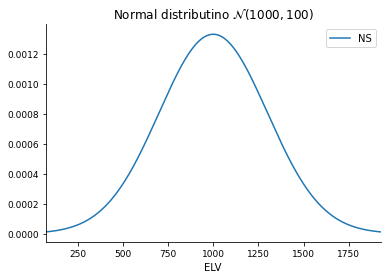

In [9]:
import scipy as sp
from scipy.stats.distributions import norm

def plot_rv(rv, label=None, xlabel=None, ax=None, title=None):
    """
    Plot a SciPy distribution (a `rv_frozen` object).
    """
    assert isinstance(rv, sp.stats._distn_infrastructure.rv_frozen), \
        'this function assumes plotting a rv_forzen random variable'
    size = 10000
    x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), size)
    y = rv.pdf(x)

    if ax is None:
        fig, ax = plt.subplots()
    sns.lineplot(x, y, ax=ax, label=label)
    
    ax.set_title(title)
    ax.set_xlim(x.min(), x.max())
    ax.set_xlabel(xlabel)
    ax.tick_params(axis='both', labelsize=9)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    
    return ax # in case want to plot more...

rvNS = norm(loc=1000, scale=300)

plot_rv(rvNS,
        xlabel="ELV",
        label="NS",
        title='Normal distributino $\mathcal{N}(1000,100)$')


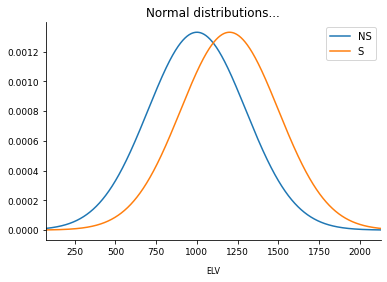

In [10]:
size = 10000

Delta = 200
rvNS = norm(loc=1000, scale=300)
rvS = norm(loc=1000+Delta, scale=300)

x = np.linspace(rvNS.ppf(0.001), rvS.ppf(0.999), size)
yNS = rvNS.pdf(x)
yS = rvS.pdf(x)

fig, ax = plt.subplots()
sns.lineplot(x, yNS, ax=ax, label="NS") #  color='black', alpha=0.5)
sns.lineplot(x, yS, ax=ax, label="S")
ax.set_title('Normal distributions...')
# ax.set_title(ax.get_title(), pad=25)
ax.set_xlim(x.min(), x.max())
ax.set_xlabel('ELV', fontsize=8, labelpad=10)
ax.tick_params(axis='both', labelsize=9)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
